# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00
time: 377 µs (started: 2023-11-29 17:14:36 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 1min 38s (started: 2023-11-29 17:14:36 +00:00)


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/training_set.csv')
df_val=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/validation_set.csv')

time: 28.3 s (started: 2023-11-29 17:16:39 +00:00)


In [ ]:
classes_0=clases_0_bug=df_train.loc[df_train['Bug Present']==0].values
classes_1=classes_1_bug=df_train.loc[df_train['Bug Present']==1].values
columns=df_train.columns
training_set=[]
j=0
for i in range(len(classes_1)):
    training_set.append(classes_1[i])
    for k in range(5):
        training_set.append(classes_0[j])
        j+=1
df_train=pd.DataFrame(training_set,columns=columns)

time: 2.14 s (started: 2023-11-29 17:17:08 +00:00)


In [ ]:
df_train

,Unnamed: 0,filename,loc,lloc,sloc,comments,multi,blank,single_comments,Cyclomatic Complexity,...,calculated_length,volume,difficulty,effort,time,bugs,number of methods,number of attributes,number of branches,Bug Present
0,1291312,fa37ab4b15077a4a9b52e559e0ef929a004e330124d214...,13,15,13,0,0,0,0,8,...,16.364528,24.000000,1.500000,36.000000,2.000000,0.008000,1.0,17.0,2.0,1
1,0,f95de9b62e6691b50a871d181844827b7473028e.py,8,3,5,0,3,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,5.0,0.0,0
2,1,9afd16629066214a70c154322b16a8acc90c2c03.py,6,4,3,0,3,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.0,0.0,0
3,2,592eabbffbbbd46a235262fdb786b15ca3571b7b.py,55,36,39,2,6,8,2,11,...,158.605938,227.476700,4.142857,942.403472,52.355748,0.075826,2.0,35.0,9.0,0
4,3,7de01ce593a0a7a8d36befd325d0a6474fe8682a.py,21,11,18,0,3,0,0,3,...,4.754888,12.000000,0.666667,8.000000,0.444444,0.004000,1.0,14.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84445,70370,b26e865c235b27d0921e3a548a49f7d7353c9899.py,6,3,2,0,4,0,0,1,...,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585,1.0,1.0,0.0,0
84446,70371,33cff754007c80b47ef154f35e4717573c6317bb.py,5,4,5,0,0,0,0,1,...,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585,1.0,6.0,0.0,0
84447,70372,16162f157e01726aa0b2e8ffcce5614e2f5eb063.py,3,3,2,0,0,0,1,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0
84448,70373,17517a99d3d991658e1dd33c0d811bf1de50054e.py,9,6,7,1,0,0,2,2,...,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585,1.0,9.0,1.0,0


time: 55.8 ms (started: 2023-11-29 17:17:10 +00:00)


In [ ]:
classes_0=clases_0_bug=df_val.loc[df_val['Bug Present']==0].values
classes_1=classes_1_bug=df_val.loc[df_val['Bug Present']==1].values
columns=df_val.columns
validation_set=[]
j=0
for i in range(len(classes_1)):
    validation_set.append(classes_1[i])
    for k in range(5):
        validation_set.append(classes_0[j])
        j+=1
df_val=pd.DataFrame(validation_set,columns=columns)

time: 1.81 s (started: 2023-11-29 17:17:10 +00:00)


In [ ]:
df_val

,filename,loc,lloc,sloc,comments,multi,blank,single_comments,Cyclomatic Complexity,mi,...,calculated_length,volume,difficulty,effort,time,bugs,number of methods,number of attributes,number of branches,Bug Present
0,6b1419553be378b76534b66c80bbfe102c97375b381df8...,54,15,37,0,12,5,0,2,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,37.0,0.0,1
1,198cdf11b175f5399337273dd6c828f015966766.py,2,2,2,0,0,0,0,1,85.288536,...,6.754888,13.931569,1.333333,18.575425,1.031968,0.004644,1.0,4.0,0.0,0
2,fc962a255b9813000a1a6af6ae8fc2787df9f9f3.py,31,14,16,0,10,5,0,6,63.125423,...,27.651484,38.053748,2.000000,76.107496,4.228194,0.012685,1.0,19.0,3.0,0
3,76727adad9cb6a1bf76b9ef414e9aa527205f3aa.py,2,2,2,0,0,0,0,1,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.0,0.0,0
4,c4465c13d1c8068c349fb1fe57c2af826a0a14fa.py,2,2,2,0,0,0,0,1,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56563,b60eee1f0b64a97dd0e39c6ec585b038ae6296d1.py,18,17,17,1,0,1,0,8,73.161694,...,51.019550,72.000000,2.000000,144.000000,8.000000,0.024000,1.0,16.0,5.0,0
56564,e9edf4eeaa4ca4df452d4cd79f49af45a3143392.py,5,5,4,0,0,0,1,1,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,9.0,0.0,0
56565,2d5d43d99bab1a14cffd8b8a4e7ec6da5d3db25b.py,4,4,4,0,0,0,0,2,79.141804,...,6.754888,11.609640,1.000000,11.609640,0.644980,0.003870,1.0,7.0,1.0,0
56566,115e059e2f6d8632fb57c6bd99657b8c354d7f79.py,28,10,18,0,8,2,0,2,67.894602,...,16.364528,27.000000,1.800000,48.600000,2.700000,0.009000,1.0,19.0,1.0,0


time: 39.9 ms (started: 2023-11-29 17:17:12 +00:00)


In [ ]:
X_train = df_train.drop(['Bug Present','filename','Unnamed: 0'], axis=1).values
y_train = df_train['Bug Present'].values
X_val = df_val.drop(['Bug Present','filename'], axis=1).values
y_val = df_val['Bug Present'].values

time: 17.9 ms (started: 2023-11-29 17:17:12 +00:00)


## Train the model

In [ ]:
model=make_pipeline(StandardScaler(), DecisionTreeClassifier())
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

time: 1.08 s (started: 2023-11-29 17:17:13 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

time: 1.15 ms (started: 2023-11-29 17:17:14 +00:00)


In [ ]:
cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

time: 16.5 s (started: 2023-11-29 17:17:14 +00:00)


In [ ]:
val_accuracy = model.score(X_val, y_val)

time: 46 ms (started: 2023-11-29 17:17:31 +00:00)


In [ ]:
print("Cross-validation results:", cross_val_results)
print("Mean Cross-validation accuracy: {:.2f}%".format(cross_val_results.mean() * 100))
print("Validation accuracy: {:.2f}%".format(val_accuracy * 100))

Cross-validation results: [0.79301362 0.79668443 0.79206631 0.79277679 0.79514506 0.79810539
 0.79253996 0.79585554 0.7955003  0.79609236]
Mean Cross-validation accuracy: 79.48%
Validation accuracy: 78.36%
time: 4.45 ms (started: 2023-11-29 17:17:31 +00:00)


# Performance Metrics

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/testing_set.csv')

time: 227 ms (started: 2023-11-29 17:17:49 +00:00)


In [ ]:
X_test= df_test.drop(['Bug Present','filename'], axis=1).values
y_test = df_test['Bug Present'].values

time: 8.46 ms (started: 2023-11-29 17:17:50 +00:00)


In [ ]:
y_pred=model.predict(X_test)

time: 8.96 ms (started: 2023-11-29 17:17:51 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 572 µs (started: 2023-11-29 17:17:52 +00:00)


In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy*100,"%")

Accuracy:  53.57142857142857 %
time: 3.34 ms (started: 2023-11-29 17:17:52 +00:00)


In [ ]:
from sklearn.metrics import roc_curve,auc

time: 1.43 ms (started: 2023-11-29 17:17:52 +00:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

time: 1.92 ms (started: 2023-11-29 17:17:53 +00:00)


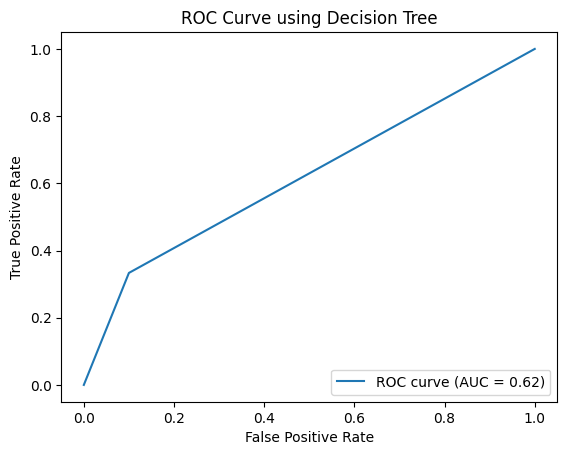

time: 429 ms (started: 2023-11-29 17:17:54 +00:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 265 ms (started: 2023-11-29 17:17:54 +00:00)


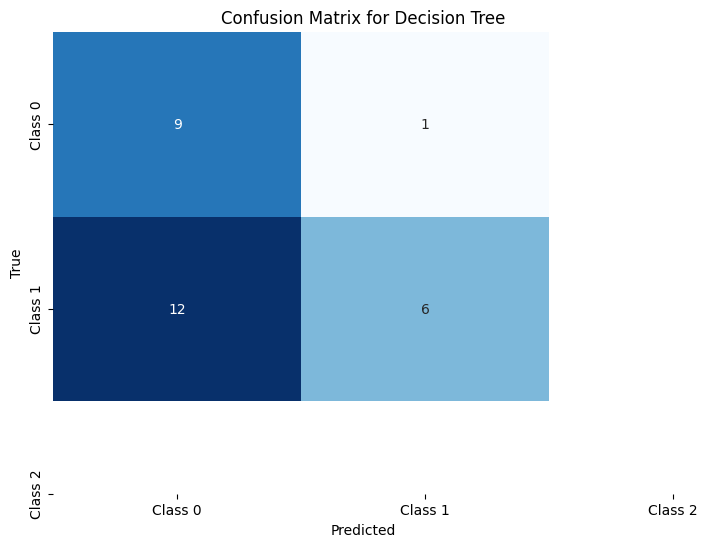

time: 262 ms (started: 2023-11-29 17:17:54 +00:00)


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')

plt.show()

In [ ]:
import joblib

time: 492 µs (started: 2023-11-29 17:17:57 +00:00)


In [ ]:
joblib.dump(model,'decision_tree.joblib')

['decision_tree.joblib']

time: 8.88 ms (started: 2023-11-29 17:17:58 +00:00)
